In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a DataFrame
data = pd.read_csv(r"C:\Users\Rahi\Downloads\Amazon Sales data.csv")

In [4]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [6]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Order ID,100.0,5.550204e+08,2.606153e+08,1.146066e+08,3.389225e+08,5.577086e+08,7.907551e+08,9.940222e+08
Units Sold,100.0,5.128710e+03,2.794485e+03,1.240000e+02,2.836250e+03,5.382500e+03,7.369000e+03,9.925000e+03
Unit Price,100.0,2.767613e+02,2.355922e+02,9.330000e+00,8.173000e+01,1.798800e+02,4.372000e+02,6.682700e+02
Unit Cost,100.0,1.910480e+02,1.882082e+02,6.920000e+00,3.584000e+01,1.072750e+02,2.633300e+02,5.249600e+02
Total Revenue,100.0,1.373488e+06,1.460029e+06,4.870260e+03,2.687212e+05,7.523144e+05,2.212045e+06,5.997055e+06
Total Cost,100.0,9.318057e+05,1.083938e+06,3.612240e+03,1.688680e+05,3.635664e+05,1.613870e+06,4.509794e+06
Total Profit,100.0,4.416820e+05,4.385379e+05,1.258020e+03,1.214436e+05,2.907680e+05,6.358288e+05,1.719922e+06


In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Select categorical variables to be encoded
categorical_cols = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']

# Initialize an empty list to store the names of original categorical columns
original_categorical_cols = []

# One-hot encode each categorical variable individually
encoded_data = pd.DataFrame()
for col in categorical_cols:
    # Create one-hot encoder
    encoder = OneHotEncoder(sparse=False, drop='first')
    
    # Fit and transform the data
    encoded_cols = encoder.fit_transform(data[[col]])
    
    # Get feature names
    feature_names = encoder.get_feature_names_out([col])
    
    # Create DataFrame with encoded columns and feature names
    encoded_cols_df = pd.DataFrame(encoded_cols, columns=feature_names)
    
    # Append the encoded columns to the encoded_data DataFrame
    encoded_data = pd.concat([encoded_data, encoded_cols_df], axis=1)
    
    # Store the name of the original categorical column
    original_categorical_cols.append(col)

# Remove the original categorical columns from the encoded_data DataFrame
data.drop(columns=original_categorical_cols, inplace=True)

# Concatenate the original data with the encoded dataset
final_data = pd.concat([data, encoded_data], axis=1)

# Display the final dataset
print("Final Dataset:")
print(final_data.head())


Final Dataset:
  Order Date   Order ID  Ship Date  Units Sold  Unit Price  Unit Cost  \
0  5/28/2010  669165933  6/27/2010        9925      255.28     159.42   
1  8/22/2012  963881480  9/15/2012        2804      205.70     117.11   
2   5/2/2014  341417157   5/8/2014        1779      651.21     524.96   
3  6/20/2014  514321792   7/5/2014        8102        9.33       6.92   
4   2/1/2013  115456712   2/6/2013        5062      651.21     524.96   

   Total Revenue  Total Cost  Total Profit  Region_Australia and Oceania  ...  \
0     2533654.00  1582243.50     951410.50                           1.0  ...   
1      576782.80   328376.44     248406.36                           0.0  ...   
2     1158502.59   933903.84     224598.75                           0.0  ...   
3       75591.66    56065.84      19525.82                           0.0  ...   
4     3296425.02  2657347.52     639077.50                           0.0  ...   

   Item Type_Household  Item Type_Meat  Item Type_Office Su

C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\

In [9]:
# Drop 'Order Date', 'Ship Date', and 'Order ID' columns from the final dataset
final_data.drop(columns=['Order Date', 'Ship Date', 'Order ID'], inplace=True)

# Display the updated final dataset
print("Final Dataset with Dropped Columns:")
print(final_data.head())


Final Dataset with Dropped Columns:
   Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  \
0        9925      255.28     159.42     2533654.00  1582243.50     951410.50   
1        2804      205.70     117.11      576782.80   328376.44     248406.36   
2        1779      651.21     524.96     1158502.59   933903.84     224598.75   
3        8102        9.33       6.92       75591.66    56065.84      19525.82   
4        5062      651.21     524.96     3296425.02  2657347.52     639077.50   

   Region_Australia and Oceania  Region_Central America and the Caribbean  \
0                           1.0                                       0.0   
1                           0.0                                       1.0   
2                           0.0                                       0.0   
3                           0.0                                       0.0   
4                           0.0                                       0.0   

   Region_Euro

Feature ranking:
1. Feature 3 (0.8288500745572881)
2. Feature 0 (0.11010307916079654)
3. Feature 89 (0.012675844496268844)
4. Feature 4 (0.010061141427280715)
5. Feature 2 (0.006683690440835691)
6. Feature 1 (0.005623646565742706)
7. Feature 93 (0.0030191921509256535)
8. Feature 66 (0.0023340014211401493)
9. Feature 92 (0.001693035636453099)
10. Feature 98 (0.0016552334914744574)
11. Feature 99 (0.001644569953804942)
12. Feature 61 (0.0014948901126569146)
13. Feature 88 (0.0013109719500120518)
14. Feature 97 (0.0010164552869952749)
15. Feature 10 (0.0009571310517223511)
16. Feature 8 (0.0008367751146538809)
17. Feature 100 (0.0007739287420841766)
18. Feature 7 (0.0007480941339551152)
19. Feature 55 (0.0006821372245468576)
20. Feature 16 (0.0004824403838562346)
21. Feature 5 (0.0004266170682332578)
22. Feature 35 (0.000414524829805549)
23. Feature 82 (0.00038508687960938075)
24. Feature 67 (0.0003693670371645945)
25. Feature 83 (0.0003623521269542912)
26. Feature 6 (0.000341775693400319

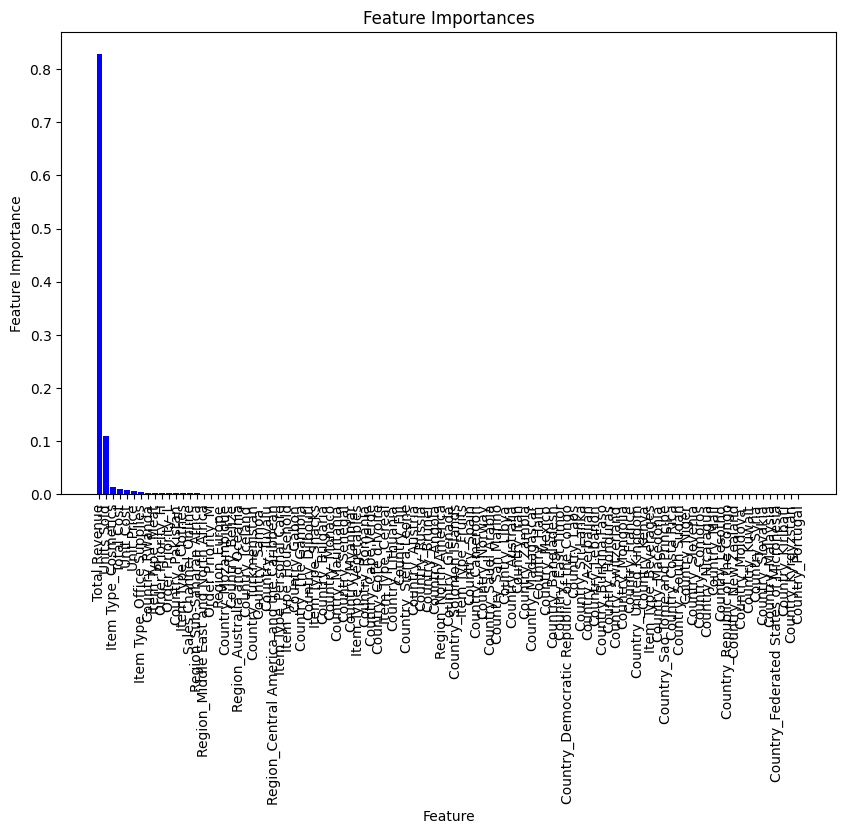

In [10]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


# Split the data into features (X) and target variable (y)
X = final_data.drop(columns=["Total Profit"])
y = final_data["Total Profit"]

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()


We see that total revenue and unit cost the most important feature which affect a lot of sales.

In [11]:
# Check the number of columns (features) in the dataset
print("Number of columns (features) in the dataset:", len(final_data.columns))

# Print the feature names to inspect them
print("Feature names:", final_data.columns)


Number of columns (features) in the dataset: 102
Feature names: Index(['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost',
       'Total Profit', 'Region_Australia and Oceania',
       'Region_Central America and the Caribbean', 'Region_Europe',
       'Region_Middle East and North Africa',
       ...
       'Item Type_Household', 'Item Type_Meat', 'Item Type_Office Supplies',
       'Item Type_Personal Care', 'Item Type_Snacks', 'Item Type_Vegetables',
       'Sales Channel_Online', 'Order Priority_H', 'Order Priority_L',
       'Order Priority_M'],
      dtype='object', length=102)


In [7]:
## Sales trend Analysis

# Analyze sales performance by region
sales_by_region = data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
print("Sales Performance by Region:")
print(sales_by_region)


Sales Performance by Region:
Region
Sub-Saharan Africa                   39672031.43
Europe                               33368932.11
Asia                                 21347091.02
Australia and Oceania                14094265.13
Middle East and North Africa         14052706.58
Central America and the Caribbean     9170385.49
North America                         5643356.55
Name: Total Revenue, dtype: float64


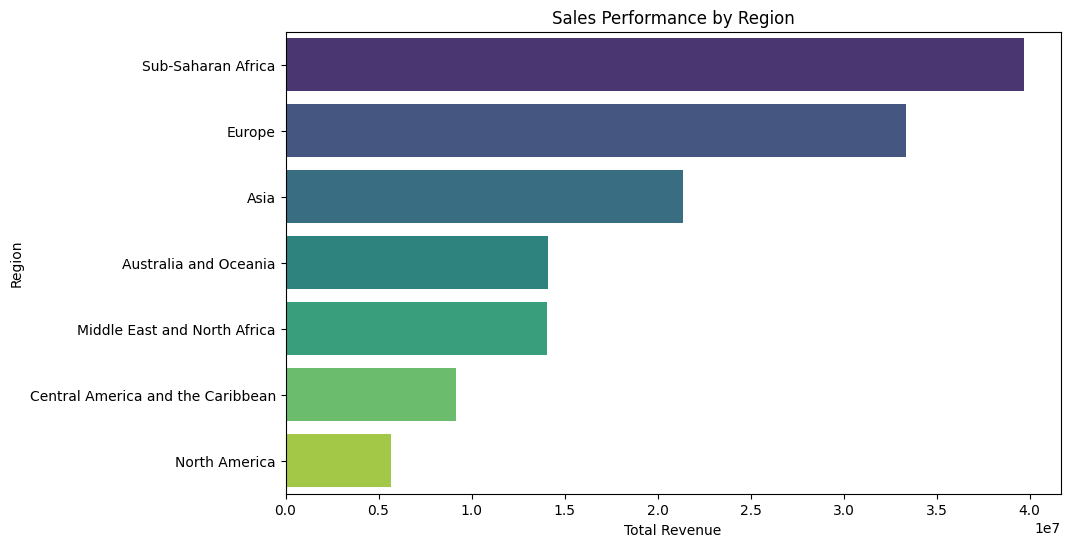

In [8]:
# Plotting sales performance by region
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_region.values, y=sales_by_region.index, palette='viridis')
plt.xlabel('Total Revenue')
plt.ylabel('Region')
plt.title('Sales Performance by Region')
plt.show()

In [9]:
# Analyze sales performance by product type
sales_by_product = data.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
print("\nSales Performance by Product Type:")
print(sales_by_product)



Sales Performance by Product Type:
Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total Revenue, dtype: float64


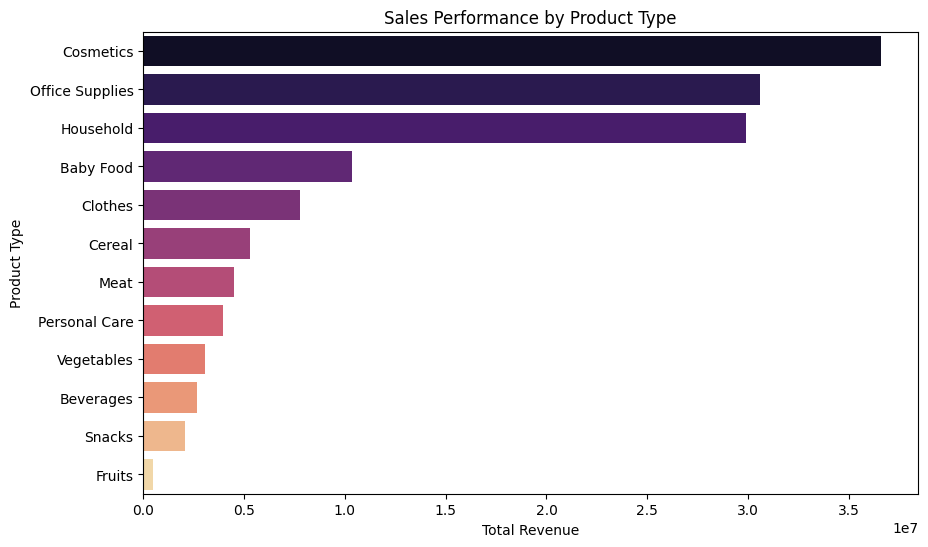

In [10]:
# Plotting sales performance by product type
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='magma')
plt.xlabel('Total Revenue')
plt.ylabel('Product Type')
plt.title('Sales Performance by Product Type')
plt.show()


In [11]:
# Analyze sales performance by sales channel
sales_by_channel = data.groupby('Sales Channel')['Total Revenue'].sum().sort_values(ascending=False)
print("\nSales Performance by Sales Channel:")
print(sales_by_channel)


Sales Performance by Sales Channel:
Sales Channel
Offline    79094809.20
Online     58253959.11
Name: Total Revenue, dtype: float64


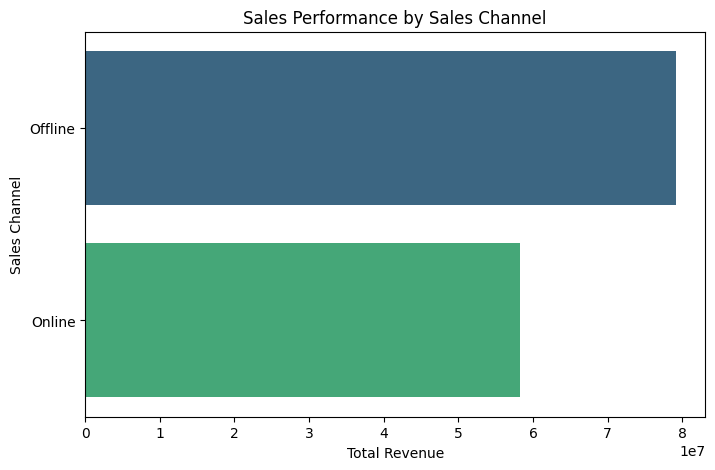

In [12]:
# Plotting sales performance by sales channel
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_channel.values, y=sales_by_channel.index, palette='viridis')
plt.xlabel('Total Revenue')
plt.ylabel('Sales Channel')
plt.title('Sales Performance by Sales Channel')
plt.show()

We see that sales are better in sub saharan africa. 

Cosmetics and office supplies have better performance. 

Offline performances better than online in terms of sales.

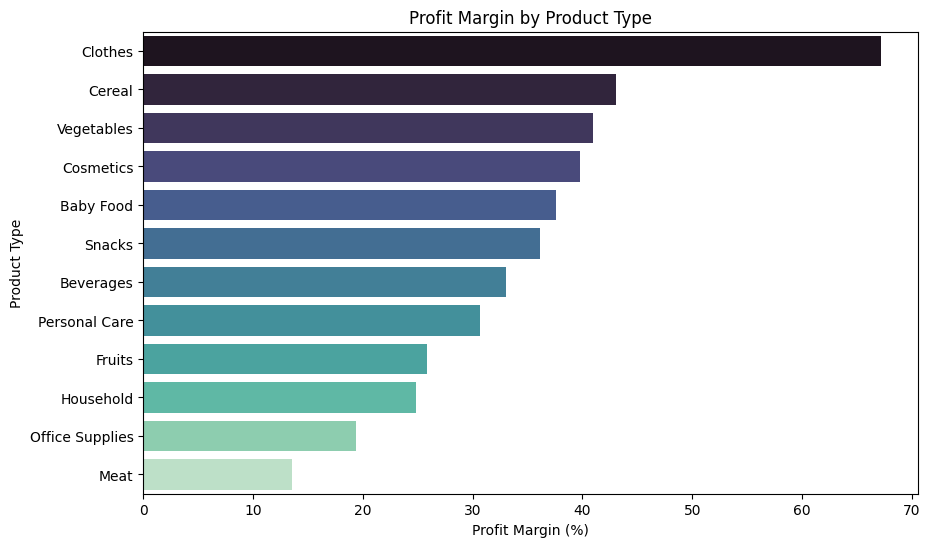

In [13]:
##Profit Margin Analysis

# Calculate profit margin for each product
data['Profit Margin'] = (data['Total Profit'] / data['Total Revenue']) * 100

# Analyze profit margin by product type
profit_margin_by_product = data.groupby('Item Type')['Profit Margin'].mean().sort_values(ascending=False)

# Plotting profit margin by product type
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_margin_by_product.values, y=profit_margin_by_product.index, palette='mako')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Product Type')
plt.title('Profit Margin by Product Type')
plt.show()

Clothes and cereal have better profit margin.

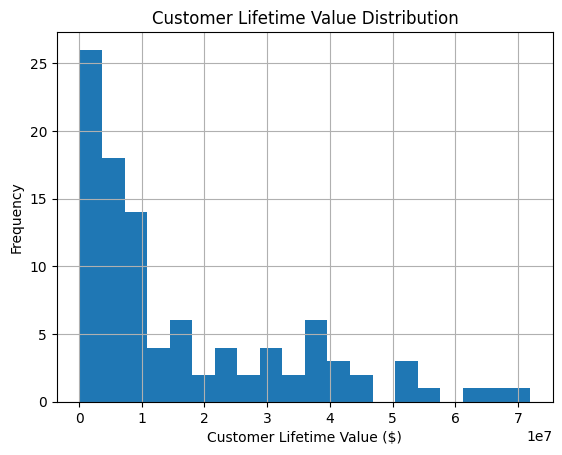

In [14]:
##  Customer Lifetime Value (CLV)


# Calculate total revenue per customer
revenue_per_customer = data.groupby('Order ID')['Total Revenue'].sum()

# Calculate the number of orders per customer
orders_per_customer = data.groupby('Order ID').size()

# Calculate average revenue per order
average_revenue_per_order = revenue_per_customer / orders_per_customer

# Calculate CLV (assuming a 12-month period)
CLV = average_revenue_per_order * 12

# Analyze CLV distribution
CLV.describe()

# Visualize CLV distribution
CLV.hist(bins=20)
plt.xlabel('Customer Lifetime Value ($)')
plt.ylabel('Frequency')
plt.title('Customer Lifetime Value Distribution')
plt.show()


the graph show that considerable number of customers bring in substantial revenue early in their relationship with the business. It may imply that the business is effective in acquiring high-value customers initially. However, it's essential to monitor and sustain this value over time by implementing strategies to retain and nurture these customers for long-term profitability.

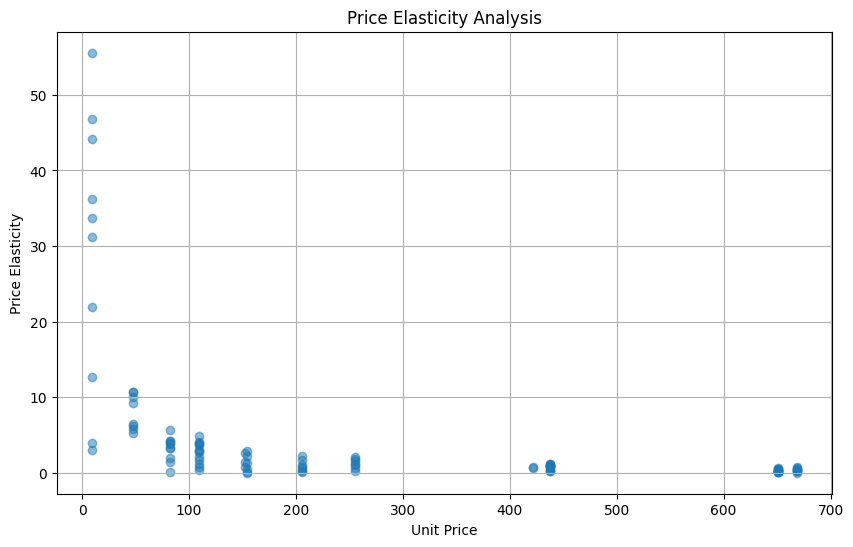

In [15]:
##Price Elasticity Analysis

# Calculate price elasticity
data['Price Elasticity'] = data['Units Sold'] / data['Unit Price'] * (data['Unit Price'].mean() / data['Units Sold'].mean())

# Plotting price elasticity
plt.figure(figsize=(10, 6))
plt.scatter(data['Unit Price'], data['Price Elasticity'], alpha=0.5)
plt.xlabel('Unit Price')
plt.ylabel('Price Elasticity')
plt.title('Price Elasticity Analysis')
plt.grid(True)
plt.show()


A graph denser at the start indicates that customers are less sensitive to price changes at lower prices, showing they're willing to buy even if prices rise. However, as prices increase further, the graph becomes less dense, indicating customers become more price-sensitive, potentially leading to fewer purchases. This suggests a need for businesses to carefully balance pricing strategies to maximize sales and revenue.

In [16]:
##Customer Segmentation

# Select relevant features for segmentation
customer_data = data[['Units Sold', 'Total Revenue', 'Total Profit']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(scaled_data)

# Add cluster labels to the DataFrame
data['Cluster'] = kmeans.labels_

# Analyze customer segments
segment_summary = data.groupby('Cluster').agg({
    'Units Sold': 'mean',
    'Total Revenue': 'mean',
    'Total Profit': 'mean'
})
print("Customer Segmentation Summary:")
print(segment_summary)


C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Customer Segmentation Summary:
          Units Sold  Total Revenue  Total Profit
Cluster                                          
0        1964.382353   4.537550e+05  1.594065e+05
1        5296.263158   2.378651e+06  6.058588e+05
2        8131.466667   4.021100e+06  1.301477e+06
3        6983.781250   5.128196e+05  2.410908e+05


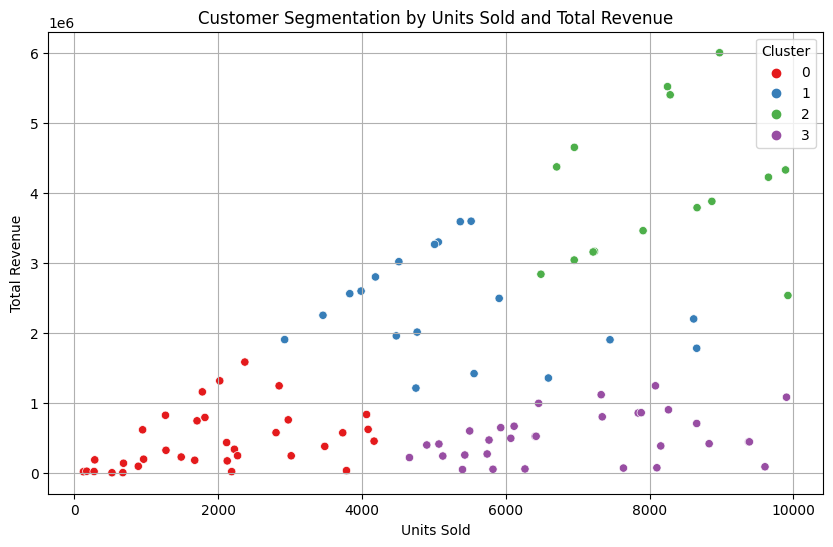

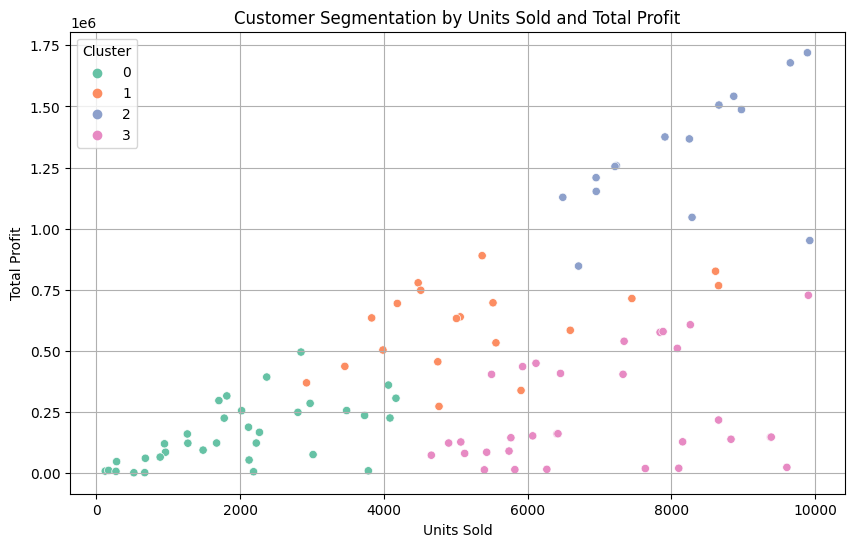

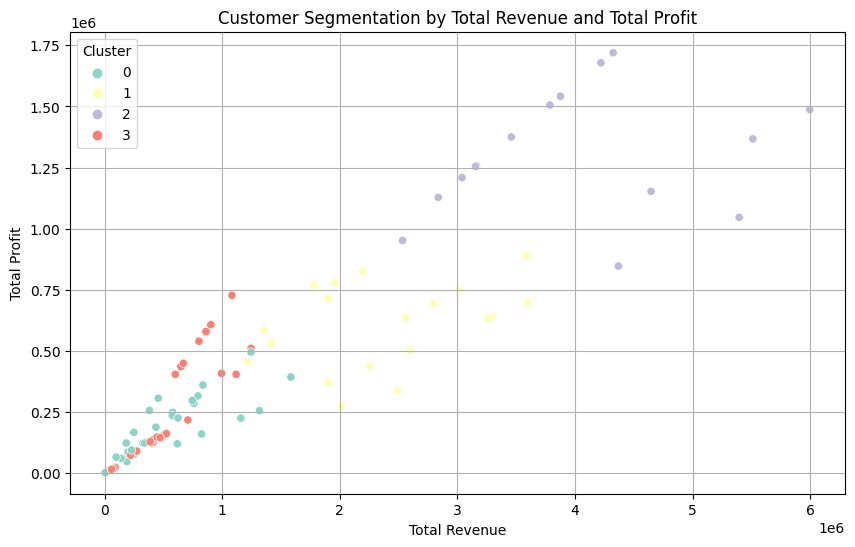

In [17]:
# Plotting customer segments
plt.figure(figsize=(10, 6))

# Plotting 'Units Sold' vs 'Total Revenue' with hue as 'Cluster'
sns.scatterplot(data=data, x='Units Sold', y='Total Revenue', hue='Cluster', palette='Set1')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.title('Customer Segmentation by Units Sold and Total Revenue')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Plotting 'Units Sold' vs 'Total Profit' with hue as 'Cluster'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Units Sold', y='Total Profit', hue='Cluster', palette='Set2')
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.title('Customer Segmentation by Units Sold and Total Profit')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Plotting 'Total Revenue' vs 'Total Profit' with hue as 'Cluster'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Total Revenue', y='Total Profit', hue='Cluster', palette='Set3')
plt.xlabel('Total Revenue')
plt.ylabel('Total Profit')
plt.title('Customer Segmentation by Total Revenue and Total Profit')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


The customer segmentation summary shows different groups of customers based on how much they buy and how profitable they are. Cluster 1 has the highest sales and profits, indicating valuable customers. Clusters 0, 2, and 3 have different levels of sales and profits, suggesting various types of customers that businesses can focus on with tailored marketing approaches.

RFM Segments:
RFM Segment
114    9
412    9
214    8
311    8
111    8
313    8
213    8
413    7
112    6
212    5
312    5
411    5
314    4
414    4
211    4
113    2
Name: count, dtype: int64


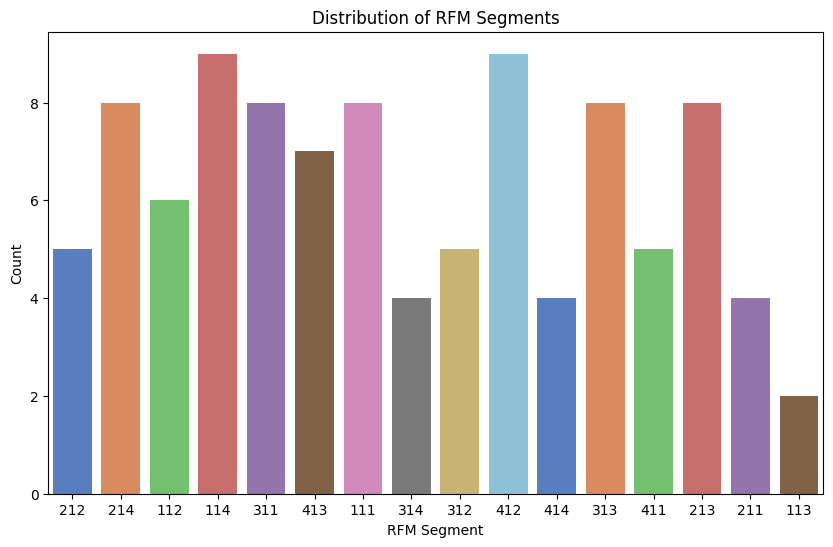

In [18]:
##RFM (Recency, Frequency, Monetary) analysis

# Convert 'Order Date' column to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Calculate Recency, Frequency, and Monetary value for each customer
snapshot_date = data['Order Date'].max() + pd.Timedelta(days=1)  # Snapshot date is the latest date in the dataset + 1 day

rfm_table = data.groupby('Order ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Order ID': 'count',  # Frequency
    'Total Revenue': 'sum'  # Monetary value
}).rename(columns={
    'Order Date': 'Recency',
    'Order ID': 'Frequency',
    'Total Revenue': 'Monetary'
})

# Segmentation based on quartiles
quantiles = rfm_table.quantile(q=[0.25, 0.5, 0.75])

# Create functions to assign R, F, and M scores
def r_score(x):
    if x <= quantiles['Recency'][0.25]:
        return 4
    elif x <= quantiles['Recency'][0.50]:
        return 3
    elif x <= quantiles['Recency'][0.75]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quantiles[c][0.25]:
        return 1
    elif x <= quantiles[c][0.50]:
        return 2
    elif x <= quantiles[c][0.75]:
        return 3
    else:
        return 4

# Assign R, F, and M scores to each customer
rfm_table['R'] = rfm_table['Recency'].apply(r_score)
rfm_table['F'] = rfm_table['Frequency'].apply(fm_score, args=('Frequency',))
rfm_table['M'] = rfm_table['Monetary'].apply(fm_score, args=('Monetary',))

# Calculate RFM score
rfm_table['RFM Score'] = rfm_table['R'] * 100 + rfm_table['F'] * 10 + rfm_table['M']

# Analyze RFM segments
rfm_table['RFM Segment'] = rfm_table['R'].astype(str) + rfm_table['F'].astype(str) + rfm_table['M'].astype(str)

# Display RFM segments
print("RFM Segments:")
print(rfm_table['RFM Segment'].value_counts())

# Visualize RFM segments
plt.figure(figsize=(10, 6))
sns.countplot(x='RFM Segment', data=rfm_table, palette='muted')
plt.xlabel('RFM Segment')
plt.ylabel('Count')
plt.title('Distribution of RFM Segments')
plt.show()


RFM segments categorize customers based on their Recency, Frequency, and Monetary value. Segments with high RFM scores (e.g., 114, 412) represent valuable customers who recently made frequent, high-value purchases, while lower-scoring segments (e.g., 314, 113) consist of dormant or inactive customers. Businesses can target high-value segments for retention efforts and implement re-engagement strategies for lower-scoring segments to maximize customer value and loyalty.

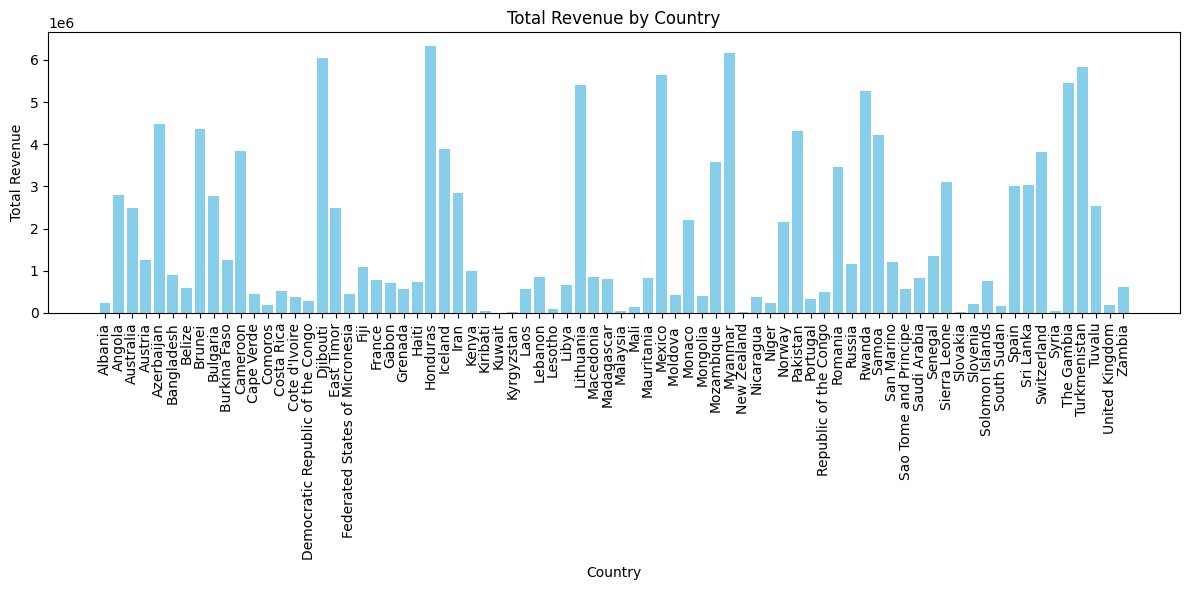

In [19]:
##Geospatial Analysis

# Group the data by country and calculate total revenue
country_sales = data.groupby('Country')['Total Revenue'].sum().reset_index()

# Visualize the distribution of sales data across countries
plt.figure(figsize=(12, 6))
plt.bar(country_sales['Country'], country_sales['Total Revenue'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


We here see the how different countries have made total revenue.
